### Extracción de indicadores del Sistema de Indicadores de la Ciudad de México

Este script extrae los indicadores del Sistema de Indicadores de la Ciudad de México. La información se obtiene de la página web https://indicadores.cdmx.gob.mx/dataset/. Se extraen los siguientes campos:
- Título
- Descripción
- Instrumento
- Derecho
- ODS
- Fuente
- URL de la fuente

In [330]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

### Funciones

In [331]:
def contar_ind_palabra_clave(tabla, *palabras):
    if not palabras:
        print("Debes ingresar al menos una palabra clave.")
        return

    expresion = "|".join(palabras)  # Une las palabras con OR lógico
    coincidencias = tabla[tabla['titulo'].str.contains(expresion, case=False, na=False, regex=True)]
    total = len(coincidencias)
    porcentaje = total / len(tabla) * 100
    print(f"Total de indicadores que contienen la(s) palabra(s) {palabras}: {total} ({porcentaje:.1f}%)")



### Extracción de información del sitio web

In [332]:
headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36'}

In [353]:
##Url básica del SI CDMX
url_basica="https://indicadores.cdmx.gob.mx/api/3/action/"

In [369]:
#Nombre de los indicadores
url_indicadores=url_basica+"package_list"

nom_indica=requests.get(url_indicadores, headers=headers, verify=False)
nom_indica=nom_indica.json()
nom_indica=nom_indica['result']
print("Total de indicadores:", len(nom_indica))

Total de indicadores: 647


C:\Users\claud\miniconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'indicadores.cdmx.gob.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [416]:
url_indicador=url_basica+"package_show?id="+nom_indica[10]
print(url_indicador)

r=requests.get(url_indicador, headers=headers, verify=False)
ejemplo=r.json()
ejemplo["result"].keys()

https://indicadores.cdmx.gob.mx/api/3/action/package_show?id=ahorros-generados-en-compras-publicas-consolidadas


C:\Users\claud\miniconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'indicadores.cdmx.gob.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


dict_keys(['author', 'author_email', 'creator_user_id', 'id', 'isopen', 'license_id', 'license_title', 'maintainer', 'maintainer_email', 'metadata_created', 'metadata_modified', 'name', 'notes', 'num_resources', 'num_tags', 'organization', 'owner_org', 'private', 'state', 'title', 'type', 'url', 'version', 'extras', 'groups', 'resources', 'tags', 'relationships_as_subject', 'relationships_as_object'])

In [427]:
ejemplo["result"]["extras"][6]

{'key': 'Derecho Constitución Política de la Ciudad de México',
 'value': 'Derecho a la buena administración pública'}

In [438]:
##Obtener datos generales de cada indicador
titulos = []
descripcion = []
fuente=[]
derecho=[]
frecuencia=[]
ods=[]
dimension = []
instrumento=[]


#Buscar
for indicadores in nom_indica:
    url_indicadores=url_basica+"package_show?id="+indicadores
    r=requests.get(url_indicadores, headers=headers, verify=False)
    r=r.json()
    titulos.append(r['result']['title'])
    descripcion.append(r['result']['notes'])
    fuente.append(r['result']['url'])
    # Buscar el valor del derecho
    # Buscar el valor exacto del derecho
    # Buscar el valor exacto del derecho
    extras = r['result'].get('extras', [])
    valor_derecho = ""
    valor_frecuencia = ""
    valor_ods = ""
    valor_dimension = ""
    valor_instrumento = ""

    for extra in extras:
        if extra.get("key") == "Derecho Constitución Política de la Ciudad de México":
            valor_derecho = extra.get("value", "")
        elif extra.get("key") == "Frecuencia":
            valor_frecuencia = extra.get("value", "")
        elif extra.get("key") == "Objetivo de Desarrollo Sostenible":
            valor_ods = extra.get("value", "")
        elif extra.get("key") == "Dimensión":
            valor_dimension = extra.get("value", "")
        elif extra.get("key") == "Instrumento":
            valor_instrumento = extra.get("value", "")

    derecho.append(valor_derecho)
    frecuencia.append(valor_frecuencia)
    ods.append(valor_ods)
    dimension.append(valor_dimension)
    instrumento.append(valor_instrumento)

C:\Users\claud\miniconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'indicadores.cdmx.gob.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\claud\miniconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'indicadores.cdmx.gob.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\claud\miniconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'indicadores.cdmx.gob.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\claud\miniconda3\Lib\s

In [440]:
    #Crear dataframe
tabla_indicadores = pd.DataFrame({
    "titulo": titulos,
    "descripcion": descripcion,
    "derecho_cdmx": derecho,
    "ods": ods,
    "instrumento": instrumento,
    "frecuencia": frecuencia,
    "dimension": dimension,
    "fuente": fuente
})
tabla_indicadores

,titulo,descripcion,derecho_cdmx,ods,instrumento,frecuencia,dimension,fuente
0,Índice de Gini,Coeficiente que determina la igualdad en la di...,Derecho a la vida digna,Reducción de las desigualdades,Visor CDMX,Bienal,Eficacia,https://www.coneval.org.mx/Medicion/paginas/co...
1,Inflación,Inflación Internanual.\r\n\r\nEl índice nacion...,No vinculado,Trabajo decente y crecimiento económico,Visor CDMX,Mensual,,https://www.inegi.org.mx/temas/inpc/
2,Escala de consideración de que existe discrimi...,Escala (0 a 10) de consideración de que existe...,Derecho a una vida libre de todo tipo de viole...,Reducción de las desigualdades,PGD,Cuatrienal,Calidad,https://www.copred.cdmx.gob.mx/edis-cdmx
3,Acceso integral al agua y al saneamiento básico,Porcentaje de la población de la CDMX con: 1) ...,Derecho al agua y a su saneamiento,Agua limpia y saneamiento,PGOT,Bienal,Eficacia,https://www.inegi.org.mx/programas/enigh/nc/20...
4,Número de accidentes anuales causados por fact...,Total de accidentes anuales causados por facto...,Derecho a la seguridad urbana y a la protecció...,Ciudades y comunidades sostenibles,PGD,Anual,Eficacia,https://www.inegi.org.mx/programas/edr/#microd...
...,...,...,...,...,...,...,...,...
642,Viviendas particulares según su antigüedad,Este indicador muestra a las viviendas de la C...,Derecho a la vivienda,Reducción de las desigualdades,Visor CDMX,Bienal,Eficacia,https://www.inegi.org.mx/programas/enigh/nc/2022/
643,Viviendas propias que cuentan con escrituras o...,Este indicador busca indagar sobre las condici...,Derecho a la vivienda,Ciudades y comunidades sostenibles,PGOT,Bienal,Eficacia,https://www.inegi.org.mx/programas/enigh/nc/20...
644,Viviendas que cuentan con calentador solar,Porcentaje de viviendas que cuentan con calent...,Derecho al desarrollo sustentable,Energía asequible y no contaminante,PGOT,Bienal,Eficacia,https://www.inegi.org.mx/programas/enigh/nc/2022/
645,Viviendas que no cuentan con abastecimiento de...,Número de viviendas que no cuentan con servici...,Derecho al agua y a su saneamiento,Agua limpia y saneamiento,Visor CDMX,Bienal,Eficacia,https://www.inegi.org.mx/programas/enigh/nc/2022/


In [441]:
# # Inicializar listas
# titulos = []
# descripcion = []
# instrumento = []
# derecho = []
# ods = []
# fuente = []
# fuente_url = []
#
#
#
# # Loop por 33 páginas
# for page in range(1, 34):
#     url_basica = f"https://indicadores.cdmx.gob.mx/dataset/?page={page}"
#
#     # Petición a la página y parseo con BeautifulSoup
#     r = requests.get(url_basica, headers=headers, verify=False)
#     sopa = BeautifulSoup(r.text, "html.parser")
#
#     # Resultados
#     resultados = sopa.find_all("div", class_="col-sm-12")
#
#     # Extraer los datos
#     for datos in resultados:
#         # Título
#         h2_tag = datos.find('h2', class_='cp-section-heading cp-default-section-heading cp-section-anchored-heading')
#         if h2_tag:
#             titulos.append(h2_tag.text.strip())
#         else:
#             titulos.append("")
#
#         # Descripción
#         p_tag = datos.find('p')
#         if p_tag:
#             descripcion.append(p_tag.text.strip())
#         else:
#             descripcion.append("")
#
#         # Inicializar variables locales para este registro
#         instrumento_val = ""
#         derecho_val = ""
#         ods_val = ""
#
#         # Buscar tags
#         tags_divs = datos.find_all("div", class_="tags")
#         for tag_div in tags_divs:
#             tag_text = tag_div.get_text(strip=True)
#
#             if "Instrumento:" in tag_text:
#                 a = tag_div.find('a')
#                 if a:
#                     instrumento_val = a.text.strip()
#
#             elif "Derecho de la Constitución Política de la CDMX" in tag_text:
#                 a = tag_div.find('a')
#                 if a:
#                     derecho_val = a.text.strip()
#
#             elif "Objetivo de Desarrollo Sostenible" in tag_text:
#                 a = tag_div.find('a')
#                 if a:
#                     ods_val = a.text.strip()
#
#         instrumento.append(instrumento_val)
#         derecho.append(derecho_val)
#         ods.append(ods_val)
#
#         # Fuente y URL
#         fuente_tag = datos.find('div', id='fuente')
#         if fuente_tag:
#             a_tag = fuente_tag.find('a')
#             if a_tag:
#                 fuente.append(a_tag.text.strip())
#                 fuente_url.append(a_tag['href'])
#             else:
#                 fuente.append("")
#                 fuente_url.append("")
#         else:
#             fuente.append("")
#             fuente_url.append("")


In [334]:
# # Crea tabla
# tabla_indicadores = pd.DataFrame({
#     "titulo": titulos,
#     "descripcion": descripcion,
#     "instrumento": instrumento,
#     "derecho": derecho,
#     "ods": ods,
#     "fuente": fuente,
#     "fuente_url": fuente_url
# })

In [442]:
#Eliminar duplicados de nombre
#tabla_indicadores = tabla_indicadores.drop_duplicates(subset='titulo')
#Eliminar acentos y espacios en blanco de la columna 'instrumento'
tabla_indicadores['instrumento'] = tabla_indicadores['instrumento'].str.replace('á', 'a').str.replace('é', 'e').str.replace('í', 'i').str.replace('ó', 'o').str.replace('ú', 'u')
#Resetear index
#tabla_indicadores.reset_index(drop=True, inplace=True)
#Eliminar index 1
#tabla_indicadores = tabla_indicadores.drop(index=1)
#Minúsculas en todas las columnas
tabla_indicadores = tabla_indicadores.apply(lambda x: x.astype(str).str.lower())
#Eliminar acentos
tabla_indicadores = tabla_indicadores.apply(lambda x: x.str.replace('á', 'a').str.replace('é', 'e').str.replace('í', 'i').str.replace('ó', 'o').str.replace('ú', 'u'))
tabla_indicadores

,titulo,descripcion,derecho_cdmx,ods,instrumento,frecuencia,dimension,fuente
0,indice de gini,coeficiente que determina la igualdad en la di...,derecho a la vida digna,reduccion de las desigualdades,visor cdmx,bienal,eficacia,https://www.coneval.org.mx/medicion/paginas/co...
1,inflacion,inflacion internanual.\r\n\r\nel indice nacion...,no vinculado,trabajo decente y crecimiento economico,visor cdmx,mensual,,https://www.inegi.org.mx/temas/inpc/
2,escala de consideracion de que existe discrimi...,escala (0 a 10) de consideracion de que existe...,derecho a una vida libre de todo tipo de viole...,reduccion de las desigualdades,pgd,cuatrienal,calidad,https://www.copred.cdmx.gob.mx/edis-cdmx
3,acceso integral al agua y al saneamiento basico,porcentaje de la poblacion de la cdmx con: 1) ...,derecho al agua y a su saneamiento,agua limpia y saneamiento,pgot,bienal,eficacia,https://www.inegi.org.mx/programas/enigh/nc/20...
4,numero de accidentes anuales causados por fact...,total de accidentes anuales causados por facto...,derecho a la seguridad urbana y a la proteccio...,ciudades y comunidades sostenibles,pgd,anual,eficacia,https://www.inegi.org.mx/programas/edr/#microd...
...,...,...,...,...,...,...,...,...
642,viviendas particulares segun su antigüedad,este indicador muestra a las viviendas de la c...,derecho a la vivienda,reduccion de las desigualdades,visor cdmx,bienal,eficacia,https://www.inegi.org.mx/programas/enigh/nc/2022/
643,viviendas propias que cuentan con escrituras o...,este indicador busca indagar sobre las condici...,derecho a la vivienda,ciudades y comunidades sostenibles,pgot,bienal,eficacia,https://www.inegi.org.mx/programas/enigh/nc/20...
644,viviendas que cuentan con calentador solar,porcentaje de viviendas que cuentan con calent...,derecho al desarrollo sustentable,energia asequible y no contaminante,pgot,bienal,eficacia,https://www.inegi.org.mx/programas/enigh/nc/2022/
645,viviendas que no cuentan con abastecimiento de...,numero de viviendas que no cuentan con servici...,derecho al agua y a su saneamiento,agua limpia y saneamiento,visor cdmx,bienal,eficacia,https://www.inegi.org.mx/programas/enigh/nc/2022/


In [443]:
print("Total de indicadores extraídos:", len(tabla_indicadores))

Total de indicadores extraídos: 647


In [444]:
#Salvar como csv
tabla_indicadores.to_csv("indicadores_sid_cdmx.csv", index=False, encoding='utf-8-sig')

### Análisis descriptivo

In [445]:
### Total de instrumentos
print("Total de instrumentos:", len(tabla_indicadores['instrumento'].unique()))

Total de instrumentos: 11


In [448]:
### Total de derechos
print("Total de derechos de la Constitución Política de la CDMX:", len(tabla_indicadores['derecho_cdmx'].unique()))

Total de derechos de la Constitución Política de la CDMX: 38


In [449]:
#Listado de derechos
print("Listado de derechos de la Constitución Política de la CDMX:")
for derecho in tabla_indicadores['derecho_cdmx'].unique():
    print(f"- {derecho}")
#Guardar en csv
pd.DataFrame(sorted(tabla_indicadores['derecho_cdmx'].unique())).to_csv("derechos.csv", index=False, header=False,encoding="latin-1")

Listado de derechos de la Constitución Política de la CDMX:
- derecho a la vida digna
- no vinculado
- derecho a una vida libre de todo tipo de violencia o discriminacion
- derecho al agua y a su saneamiento
- derecho a la seguridad urbana y a la proteccion civil
- derecho a la salud
- derechos de personas con discapacidad
- derecho a la buena administracion publica
- derecho a la educacion
- derecho a la tierra, al territorio y a los recursos naturales
- derechos de las personas migrantes y sujetas de proteccion internacional
- derechos de personas mayores
- derecho al desarrollo sustentable
- derecho a la movilidad
- derecho de acceso a la justicia
- derecho a la ciencia y a la innovacion tecnologica
- derecho al trabajo
- derecho a un medio ambiente sano
- derecho a la integridad
- proteccion a los animales
- economia, trabajo y seguridad social
- derecho a la vivienda
- derecho al deporte
- derechos de las niñas, niños y adolescentes
- derechos laborales
- derecho a la seguridad ci

In [450]:
##Total de ODS
print("Total de ODS:", len(tabla_indicadores['ods'].unique()))
for objetivo in tabla_indicadores['ods'].unique():
    print(f"- {objetivo}")
#Guardar en csv
pd.DataFrame(sorted(tabla_indicadores['ods'].unique())).to_csv("ods.csv", index=False, header=False,encoding="latin-1")

Total de ODS: 19
- reduccion de las desigualdades
- trabajo decente y crecimiento economico
- agua limpia y saneamiento
- ciudades y comunidades sostenibles
- salud y bienestar
- paz, justicia e instituciones solidas
- educacion de calidad
- produccion y consumo responsables
- industria, innovacion e infraestructura
- energia asequible y no contaminante
- paz, justicia e instituciones solidasderechos humanos, seguridad y justicia
- accion por el clima
- vida de ecosistemas terrestres
- no vinculado
- 
- igualdad de genero
- hambre cero
- fin de la pobreza
- alianzas para lograr los objetivos


In [451]:
#Filtrar aquel que tenga ods Secretaría de Turismo
tabla_indicadores[tabla_indicadores['instrumento'].str.contains("Visor Alcaldias")]

,titulo,descripcion,derecho_cdmx,ods,instrumento,frecuencia,dimension,fuente


In [452]:
plt.rcParams['font.family'] = 'Poppins'

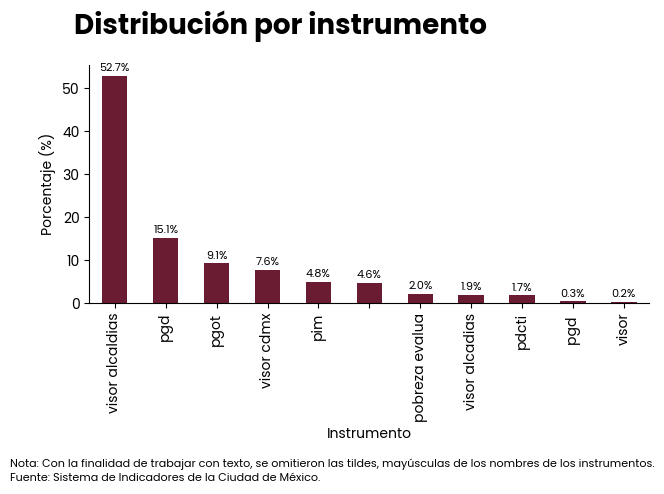

In [453]:
# Use full path to Roboto

tabla_indicadores['instrumento'].value_counts(normalize=True).mul(100).plot.bar(color="#691c32")

#plt.title('Distribución por instrumento',  fontweight='bold', fontsize=20)
plt.text(-0.8, tabla_indicadores['instrumento'].value_counts(normalize=True).mul(100).max() + 10,
         'Distribución por instrumento',
         fontsize=20, fontweight='bold', ha='left')

plt.ylabel('Porcentaje (%)')
plt.xlabel('Instrumento')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.figtext(
    0.985, -0.02,
    "Nota: Con la finalidad de trabajar con texto, se omitieron las tildes, mayúsculas de los nombres de los instrumentos.",
    ha='right', fontsize=8
)


plt.figtext(
    0.22, -0.05,
    "Fuente: Sistema de Indicadores de la Ciudad de México.",
    ha='center', fontsize=8
)

#Añadir etiquetas a las barras
for index, value in enumerate(tabla_indicadores['instrumento'].value_counts(normalize=True).mul(100)):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
#Salvar la figura
plt.savefig("distribucion_por_instrumento.png", bbox_inches='tight', dpi=300)


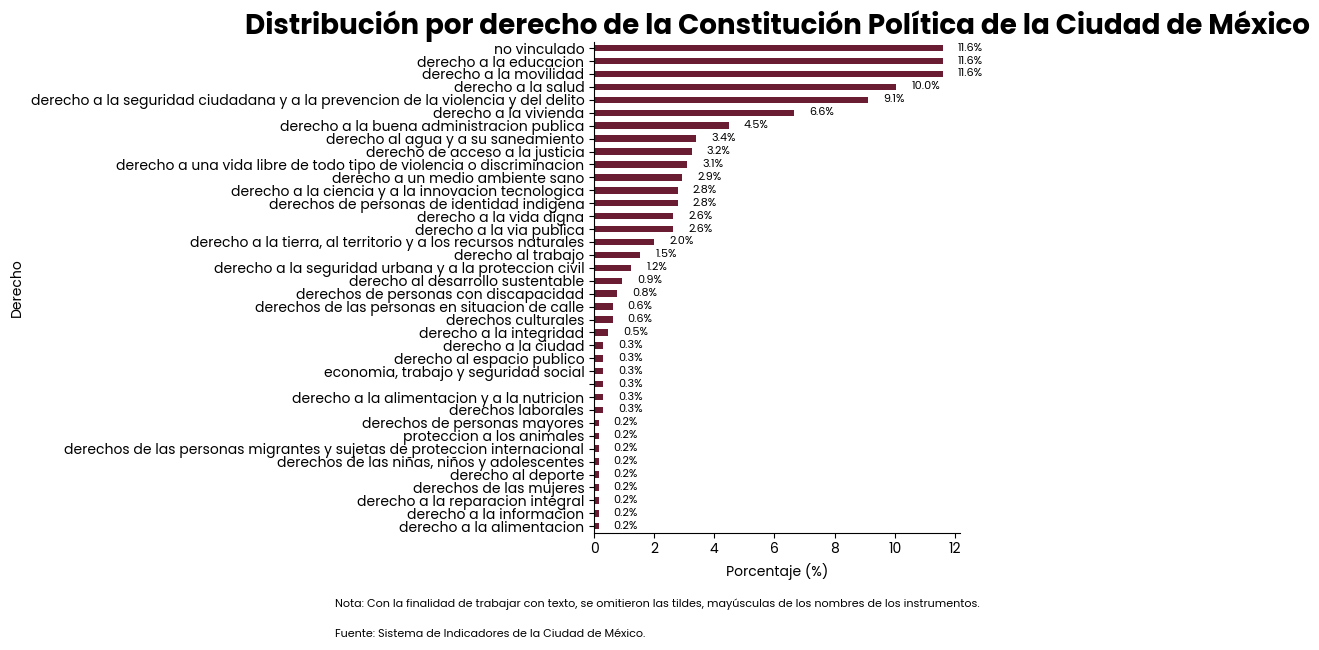

In [455]:
data = tabla_indicadores['derecho_cdmx'].value_counts(normalize=True).mul(100).sort_values(ascending=False)

data.plot.barh(color="#691c32", figsize=(10, 6))
plt.gca().invert_yaxis()
plt.title('Distribución por derecho de la Constitución Política de la Ciudad de México',
          fontweight='bold', fontsize=20, va="center_baseline")

# Axis labels
plt.xlabel('Porcentaje (%)')
plt.ylabel('Derecho')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Fuente
plt.figtext(
    0.985, -0.02,
    "Nota: Con la finalidad de trabajar con texto, se omitieron las tildes, mayúsculas de los nombres de los instrumentos.",
    ha='right', fontsize=8
)

plt.figtext(
    0.495, -0.07,
    "Fuente: Sistema de Indicadores de la Ciudad de México.",
    ha='center', fontsize=8
)

# Add labels to the bars
for i, (index, value) in enumerate(data.items()):
    plt.text(value + 0.5, i, f'{value:.1f}%', va='center', fontsize=8)

plt.tight_layout()

# Save figure
plt.savefig("distribucion_por_derecho.png", bbox_inches='tight', dpi=100)


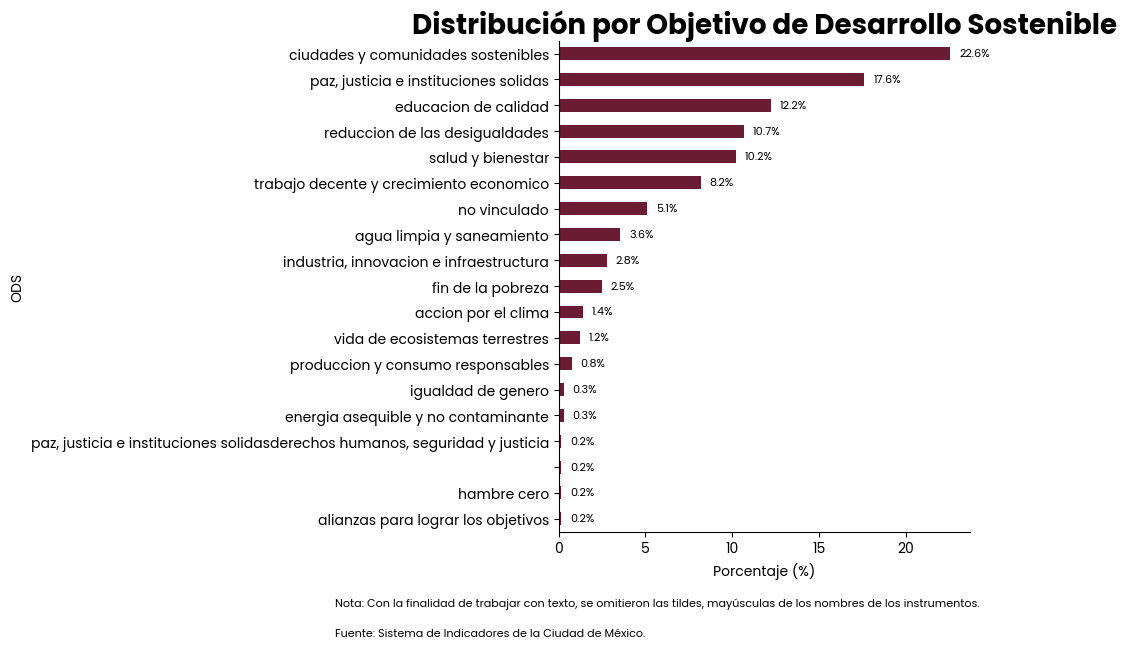

In [456]:
data_ods = tabla_indicadores['ods'].value_counts(normalize=True).mul(100).sort_values(ascending=False)

data_ods.plot.barh(color="#691c32", figsize=(10, 6))
plt.gca().invert_yaxis()
plt.title('Distribución por Objetivo de Desarrollo Sostenible',
          fontweight='bold', fontsize=20, va="center_baseline")



# Axis labels
plt.xlabel('Porcentaje (%)')
plt.ylabel('ODS')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Fuente
plt.figtext(
    0.985, -0.02,
    "Nota: Con la finalidad de trabajar con texto, se omitieron las tildes, mayúsculas de los nombres de los instrumentos.",
    ha='right', fontsize=8
)

plt.figtext(
    0.495, -0.07,
    "Fuente: Sistema de Indicadores de la Ciudad de México.",
    ha='center', fontsize=8
)

# Add labels to the bars
for i, (index, value) in enumerate(data_ods.items()):
    plt.text(value + 0.5, i, f'{value:.1f}%', va='center', fontsize=8)

plt.tight_layout()

# Save figure
plt.savefig("distribucion_por_ods.png", bbox_inches='tight', dpi=100)

#### Identificación de indicadores que contengan palabras clave relacionadas con los grupos vulnerables de la Ciudad de México

En el artículo 11 de la Constitución Política de la Ciudad de México se enlistan los grupos vulnerables.

In [457]:
## Indicadores relacionados con población vulnerable
contar_ind_palabra_clave(tabla_indicadores, "mujer")
contar_ind_palabra_clave(tabla_indicadores, "pueblo")
contar_ind_palabra_clave(tabla_indicadores, "indigena")
contar_ind_palabra_clave(tabla_indicadores, "niños")
contar_ind_palabra_clave(tabla_indicadores, "adolescente")
contar_ind_palabra_clave(tabla_indicadores, "personas mayores")
contar_ind_palabra_clave(tabla_indicadores, "situacion de calle")
contar_ind_palabra_clave(tabla_indicadores, "lgbttti")
contar_ind_palabra_clave(tabla_indicadores, "discapacidad")
contar_ind_palabra_clave(tabla_indicadores, "adolescente")
contar_ind_palabra_clave(tabla_indicadores, "migrante")
contar_ind_palabra_clave(tabla_indicadores, "asistencia social")

Total de indicadores que contienen la(s) palabra(s) ('mujer',): 4 (0.6%)
Total de indicadores que contienen la(s) palabra(s) ('pueblo',): 1 (0.2%)
Total de indicadores que contienen la(s) palabra(s) ('indigena',): 19 (2.9%)
Total de indicadores que contienen la(s) palabra(s) ('niños',): 1 (0.2%)
Total de indicadores que contienen la(s) palabra(s) ('adolescente',): 2 (0.3%)
Total de indicadores que contienen la(s) palabra(s) ('personas mayores',): 1 (0.2%)
Total de indicadores que contienen la(s) palabra(s) ('situacion de calle',): 1 (0.2%)
Total de indicadores que contienen la(s) palabra(s) ('lgbttti',): 0 (0.0%)
Total de indicadores que contienen la(s) palabra(s) ('discapacidad',): 3 (0.5%)
Total de indicadores que contienen la(s) palabra(s) ('adolescente',): 2 (0.3%)
Total de indicadores que contienen la(s) palabra(s) ('migrante',): 1 (0.2%)
Total de indicadores que contienen la(s) palabra(s) ('asistencia social',): 1 (0.2%)


In [458]:
for indicador in tabla_indicadores[tabla_indicadores['titulo'].str.contains("porcentaje", case=False, na=False)]['titulo']:
    print(indicador)

porcentaje de red vial con mantenimiento
porcentaje de poblacion con cobertura de transporte publico masivo
porcentaje de infraestructura vial ciclista implementada
porcentaje de tramites digitalizados
porcentaje de estaciones de transporte masivo con conexion a la infraestructura vial ciclista
porcentaje de viviendas que reciclan la basura
porcentaje de viviendas que separan la basura en organica e inorganica
porcentaje de colonias donde las viviendas tienen acceso a espacio publico a menos de 10 minutos
porcentaje de delitos con inicio de carpeta de investigacion que fue resuelta por reparacion del daño o porque se otorgo el perdon
porcentaje de delitos con inicio de carpeta de investigacion sin resolucion
porcentaje de disminucion del tiempo promedio de traslado en los nuevos corredores y lineas de transporte publico
porcentaje de disminucion en la percepcion de inseguridad en el transporte publico
porcentaje de empresas que realizaron proyectos de innovacion
porcentaje de entidades

#### Identificación de indicadores con nombre correctos e incorrectos
Para este caso se buscan aquellos que en su  nombre contengan las palabras porcentaje, tasa, índice

In [459]:
contar_ind_palabra_clave(tabla_indicadores, "porcentaje", "tasa", "indice", "razon")

Total de indicadores que contienen la(s) palabra(s) ('porcentaje', 'tasa', 'indice', 'razon'): 199 (30.8%)


In [460]:
contar_ind_palabra_clave(tabla_indicadores,"numero")

Total de indicadores que contienen la(s) palabra(s) ('numero',): 67 (10.4%)


In [461]:
indica_nom_mal = tabla_indicadores['titulo'][~tabla_indicadores['titulo'].str.contains("porcentaje|tasa|indice|razon", case=False, na=False)]


for indicador in indica_nom_mal:
    print(indicador)

# Guardar en CSV
indica_nom_mal.to_csv("indicadores_nombres_mal.csv", index=False,encoding="latin-1")


inflacion
escala de consideracion de que existe discriminacion
acceso integral al agua y al saneamiento basico
numero de accidentes anuales causados por factores naturales y ambientales
adolescentes en actividades de prevencion en los centros de atencion primaria en adicciones
afiliacion de personas con discapacidad a servicios de salud
agua no contabilizada a (agua producida no facturada)
agua potable perdida por fugas en las redes de agua potable
agua renovable anual per capita
ahorros generados en compras publicas consolidadas
alcaldias con atlas de riesgo actualizados (hasta 5 años) por sgrip y cenapred
alumnos inscritos en escuelas publicas de alvaro obregon
alumnos inscritos en escuelas publicas de benito juarez
alumnos inscritos en escuelas publicas de cuauhtemoc
alumnos inscritos en escuelas publicas de miguel hidalgo
alumnos inscritos en escuelas publicas de tlahuac
alumnos inscritos en escuelas publicas de venustiano carranza
alumnos inscritos en escuelas publicas de xochimil